## Pan India Coal consumption Data Visualisation

- Data set taken from National Data Analytics website.(https://ndap.niti.gov.in/)
- Coal utilisation data from Year 2011 to 2022
- Close to 2000 data points with 7 feature points
- 26 states covered

In [40]:
# Load the dataset
import pandas as pd
coal_data = pd.read_csv("./dataset/Coal_Consumption_by_State.csv")
coal_data.head(3)

,Country,State lgd code,State,Year,Types of coal,Coal consuming sectors,Coal consumed
0,India,1,Jammu And Kashmir,2014,RAW COAL,PULP & PAPER,8000.0
1,India,1,Jammu And Kashmir,2014,RAW COAL,CEMENT,15000.0
2,India,1,Jammu And Kashmir,2015,RAW COAL,OTHER,12000.0


In [41]:
#How many features we have
coal_data.columns

Index(['Country', 'State lgd code', 'State', 'Year', 'Types of coal',
       'Coal consuming sectors', 'Coal consumed'],
      dtype='object')

In [42]:
# Renaming features
coal_data.columns = ['Country', 'State_Code', 'State_Name', 'Year', 'Coal_Type', 
                     'Sector', 'Coal_Consumed(tons)']
coal_data.head(3)

,Country,State_Code,State_Name,Year,Coal_Type,Sector,Coal_Consumed(tons)
0,India,1,Jammu And Kashmir,2014,RAW COAL,PULP & PAPER,8000.0
1,India,1,Jammu And Kashmir,2014,RAW COAL,CEMENT,15000.0
2,India,1,Jammu And Kashmir,2015,RAW COAL,OTHER,12000.0


In [43]:
# Checking if there is any Null value exists
coal_data.isnull().sum()

Country                0
State_Code             0
State_Name             0
Year                   0
Coal_Type              0
Sector                 0
Coal_Consumed(tons)    0
dtype: int64

### Basic Data Visualisation

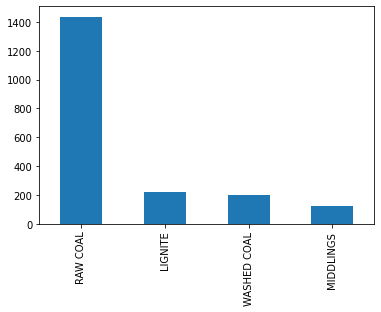

In [44]:
# Types of coal used across states
_ = coal_data['Coal_Type'].value_counts().plot(kind='bar')

In [45]:
# Which state how many sectors consume coals
coal_data['State_Name'].value_counts()

West Bengal          166
Jharkhand            162
Gujarat              156
Odisha               137
Tamil Nadu           133
Rajasthan            128
Chhattisgarh         122
Madhya Pradesh       117
Andhra Pradesh       107
Uttar Pradesh        106
Telangana            105
Maharashtra           88
Karnataka             85
Haryana               53
Punjab                49
Delhi                 45
Bihar                 43
Assam                 37
Jammu And Kashmir     28
Ladakh                28
Uttarakhand           20
Meghalaya             19
Kerala                19
Himachal Pradesh      18
Goa                    8
Arunachal Pradesh      5
Name: State_Name, dtype: int64

In [148]:
# Creating a function to plot coal consumption of a state by year
def plot_state_coal_consump_by_year(state='Odisha'):
    state_coal_data = coal_data[coal_data['State_Name']==state]
    state_data_gb = state_coal_data[['Year', 'Coal_Consumed(tons)']].groupby('Year').sum().reset_index()
    x_ax_year = state_data_gb['Year']
    y_ax_cc = state_data_gb['Coal_Consumed(tons)']
    plt.plot(x_ax_year, y_ax_cc, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
    #plt.bar(x_ax_year, y_ax_cc)
    plt.xlabel("Year")
    plt.ylabel("Coal consumption(tons)")
    plt.title(f"Year wise total coal consumption({state})")
    plt.show()

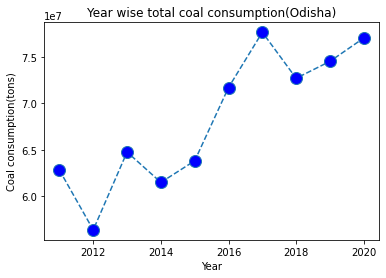

In [102]:
plot_state_coal_consump_by_year()

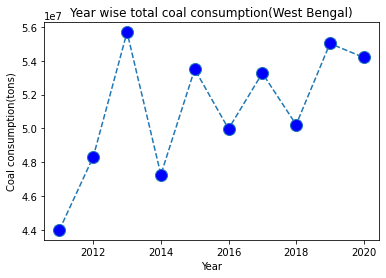

In [103]:
#A neighbour state
plot_state_coal_consump_by_year("West Bengal")

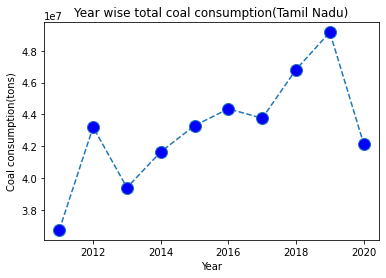

In [104]:
# A southern state
plot_state_coal_consump_by_year("Tamil Nadu")

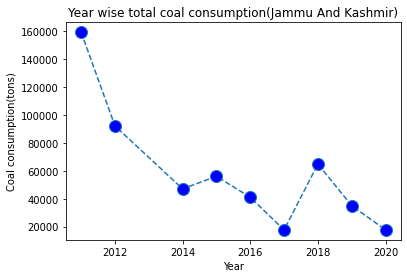

In [105]:
# A Northern state
plot_state_coal_consump_by_year("Jammu And Kashmir")

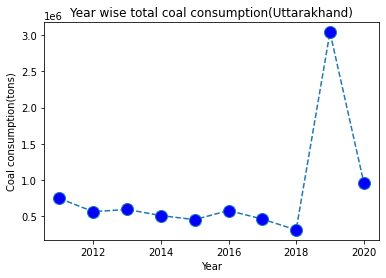

In [123]:
plot_state_coal_consump_by_year("Uttarakhand")

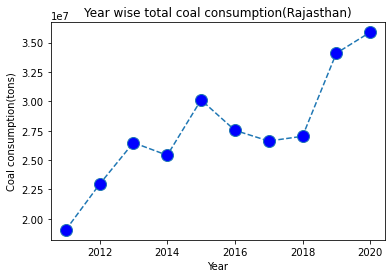

In [106]:
# A Western state
plot_state_coal_consump_by_year("Rajasthan")

- Observation: In all states the coal consumptions for the year 2019-2020 declined where as for Rajstan and Odisha the trend was still upward.

In [114]:
## Which sector consumed how much coal in a state
def plot_state_coal_consump_by_sector(state='Odisha'):
    state_coal_data = coal_data[coal_data['State_Name']==state]
    state_data_gb = state_coal_data[['Sector', 'Coal_Consumed(tons)']].groupby('Sector').sum().reset_index()
    x_ax = state_data_gb['Sector']
    y_ax = state_data_gb['Coal_Consumed(tons)']
    plt.bar(x_ax, y_ax)
    plt.xticks(rotation=90)
    #plt.bar(x_ax_year, y_ax_cc)
    plt.xlabel("Sector")
    plt.ylabel("Coal consumption(tons)")
    plt.title(f"Sector wise total coal consumption({state})")
    plt.show()

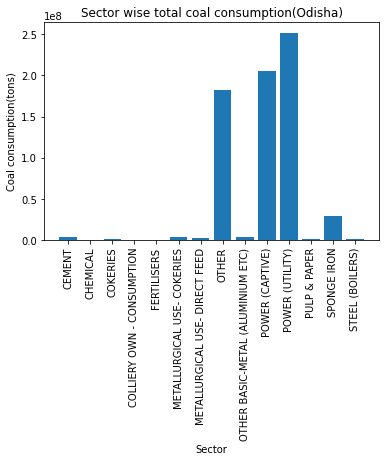

In [115]:
plot_state_coal_consump_by_sector()

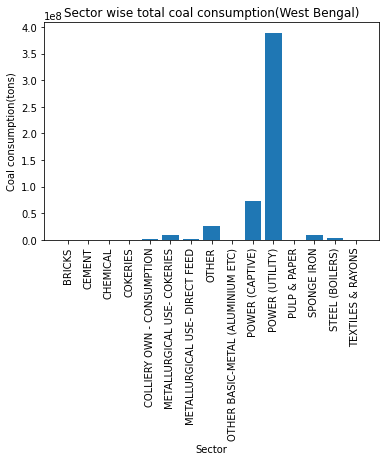

In [116]:
plot_state_coal_consump_by_sector("West Bengal")

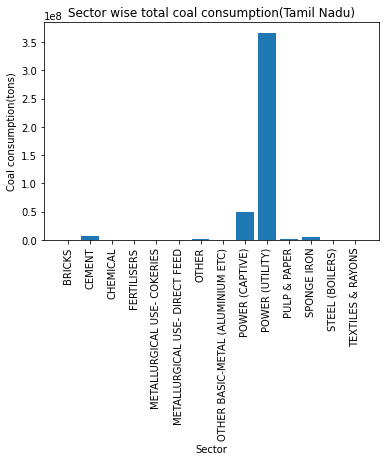

In [117]:
plot_state_coal_consump_by_sector("Tamil Nadu")

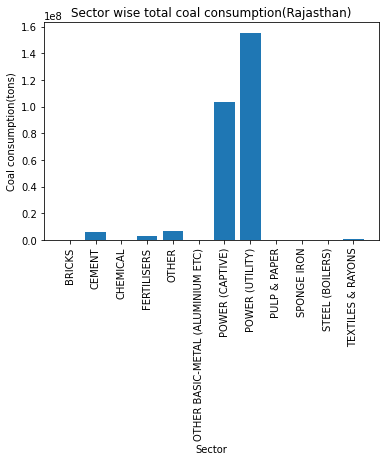

In [118]:
plot_state_coal_consump_by_sector("Rajasthan")

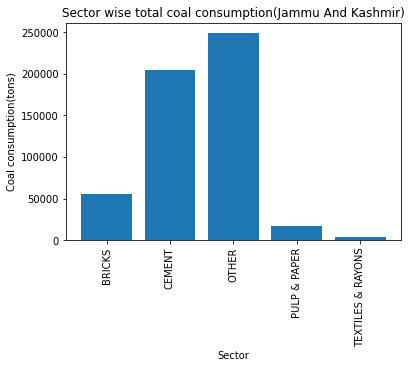

In [120]:
plot_state_coal_consump_by_sector("Jammu And Kashmir")

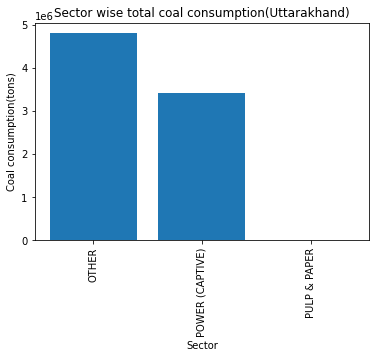

In [121]:
plot_state_coal_consump_by_sector("Uttarakhand")

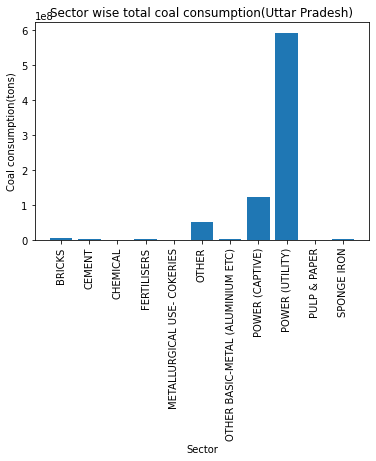

In [149]:
plot_state_coal_consump_by_sector("Uttar Pradesh")

- Observation: In sectorwise distribution the states from east, south and west have almost similar. 
- The power utility and captive sector consumed more coal whereas in Northern side the consumption pattern is completely different
- Maybe due to the presence of Hydro projects the coal consumption is less in nothern part.

### Plotting Consumption chart for span India
In India which sector consumed how much coal

In [140]:
# Creating a bar_plot function
def plot_bar_diagram(x_ax, y_ax, x_lbl, y_lbl, title):
    plt.bar(x_ax, y_ax)
    plt.xticks(rotation=90)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.title(title)
    plt.show()

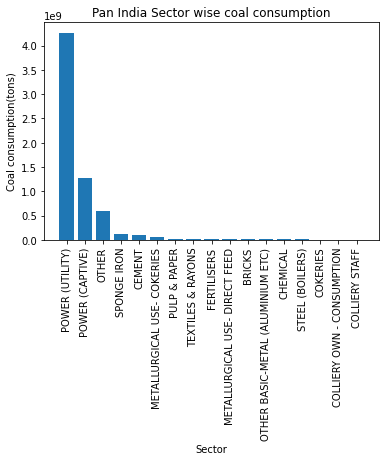

In [145]:
coal_data_sector_wise = coal_data[['Sector', 'Coal_Consumed(tons)']].groupby('Sector').sum().reset_index()
# Shorting the values
coal_data_sector_wise = coal_data_sector_wise.sort_values('Coal_Consumed(tons)', ascending=False)
plot_bar_diagram(x_ax = coal_data_sector_wise['Sector'], 
                 y_ax = coal_data_sector_wise['Coal_Consumed(tons)'], 
                 x_lbl = "Sector",
                 y_lbl = "Coal consumption(tons)", 
                 title = "Pan India Sector wise coal consumption")

- Observation: From the data it is clear that in India we consume coal mostly for the Power generations.

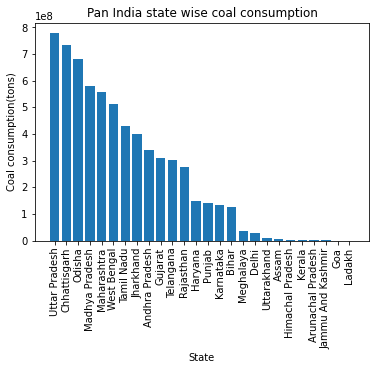

In [144]:
#Pan India state wise coal consumption
coal_data_state_wise = coal_data[['State_Name', 'Coal_Consumed(tons)']].groupby('State_Name').sum().reset_index()
coal_data_state_wise = coal_data_state_wise.sort_values('Coal_Consumed(tons)', ascending=False)
plot_bar_diagram(x_ax = coal_data_state_wise['State_Name'], 
                 y_ax = coal_data_state_wise['Coal_Consumed(tons)'], 
                 x_lbl = "State",
                 y_lbl = "Coal consumption(tons)", 
                 title = "Pan India state wise coal consumption")

- Observations: Its clear that UP was the highest coal consumer while Ladakh was lowest in between year 2011 to 2020.
- UP uses coal mostly for its energy demands.

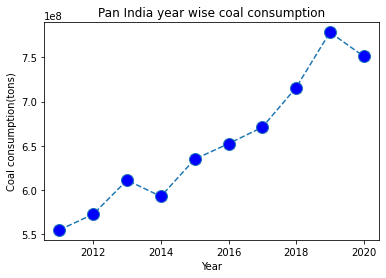

In [147]:
#Pan India year wise coal consumption
coal_data_year_wise = coal_data[['Year', 'Coal_Consumed(tons)']].groupby('Year').sum().reset_index()

#Plot the chart
x_ax_year = coal_data_year_wise['Year']
y_ax_cc = coal_data_year_wise['Coal_Consumed(tons)']
plt.plot(x_ax_year, y_ax_cc, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel("Year")
plt.ylabel("Coal consumption(tons)")
plt.title(f"Pan India year wise coal consumption")
plt.show()

- Observations: Coal consumption keeps on increasing year by year due to the increasing energy demand.
- There was dip in demand in between 2019-2020 because of Covid.